In [1]:
!wget https://raw.githubusercontent.com/PratikGarai/MNIST-Federated/master/04_Orientation_Model/dataset.py

--2021-08-30 05:49:50--  https://raw.githubusercontent.com/PratikGarai/MNIST-Federated/master/04_Orientation_Model/dataset.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3105 (3.0K) [text/plain]
Saving to: ‘dataset.py’

dataset.py          100%[===================>]   3.03K  --.-KB/s    in 0s      

2021-08-30 05:49:50 (43.3 MB/s) - ‘dataset.py’ saved [3105/3105]



In [39]:
from dataset import MNISTDataset, printGridSlice
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
dataset = MNISTDataset(4)

11501568/11490434 [==============================] - 0s 0us/step


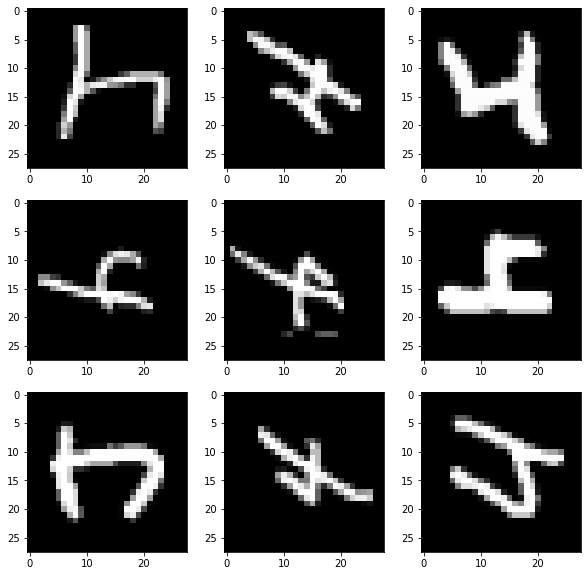

[2, 3, 0, 1, 1, 1, 2, 3, 3]


In [4]:
dataset.printSlice(3, 3)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(np.array(dataset.x), np.array(dataset.y), test_size = 0.15)
x_train = x_train.reshape(*x_train.shape, 1)
x_test = x_test.reshape(*x_test.shape, 1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4965, 28, 28, 1)
(877, 28, 28, 1)
(4965,)
(877,)


In [35]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding="same", activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=164, activation='relu'),
    tf.keras.layers.Dense(units=4, activation='softmax')
])

model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 28, 28, 32)        160       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 28, 28, 32)        4128      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 14, 14, 64)        8256      
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 14, 14, 64)        16448     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 3136)             

In [36]:
history = model.fit(
    x_train, 
    y_train, 
    validation_data = (x_test, y_test),
    epochs = 10
)

Epoch 1/10
156/156 [==============================] - 3s 12ms/step - loss: 0.4166 - accuracy: 0.9484 - val_loss: 0.0372 - val_accuracy: 0.9909
Epoch 2/10
156/156 [==============================] - 1s 9ms/step - loss: 0.0164 - accuracy: 0.9936 - val_loss: 0.0156 - val_accuracy: 0.9954
Epoch 3/10
156/156 [==============================] - 1s 9ms/step - loss: 0.0095 - accuracy: 0.9974 - val_loss: 0.0300 - val_accuracy: 0.9909
Epoch 4/10
156/156 [==============================] - 1s 9ms/step - loss: 0.0084 - accuracy: 0.9980 - val_loss: 0.0209 - val_accuracy: 0.9920
Epoch 5/10
156/156 [==============================] - 1s 9ms/step - loss: 0.0107 - accuracy: 0.9958 - val_loss: 0.0113 - val_accuracy: 0.9954
Epoch 6/10
156/156 [==============================] - 1s 9ms/step - loss: 0.0268 - accuracy: 0.9911 - val_loss: 0.0458 - val_accuracy: 0.9840
Epoch 7/10
156/156 [==============================] - 1s 9ms/step - loss: 0.0127 - accuracy: 0.9964 - val_loss: 0.0179 - val_accuracy: 0.9954
Epoch

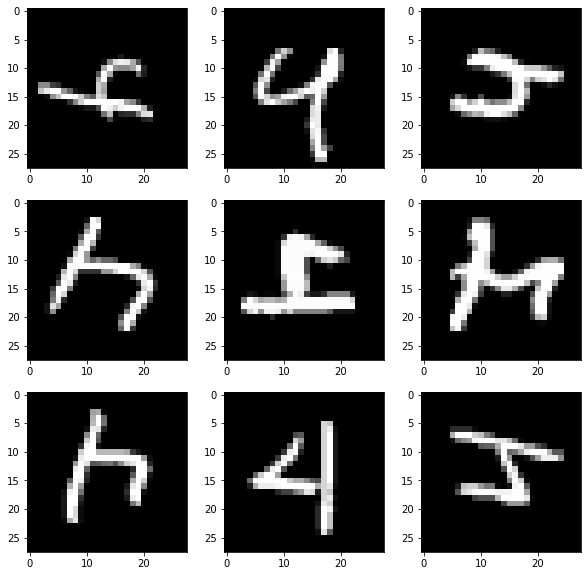

[1 0 3 2 1 2 2 0 3]


In [42]:
val_x = x_test.reshape(-1, 28, 28)
printGridSlice(val_x, 3, 3)
print(y_test[:9])